In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SPORTION AM\AppData\Local\Temp\ipykernel_4244\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [89]:
data  = pd.read_csv("houses.csv")

C:\Users\SPORTION AM\AppData\Local\Temp\ipykernel_3376\2739933127.py:1: DtypeWarning: Columns (0,2,3,4,6,9,10,11,13,16,19,20,21,24,28,29,30,31,32,33,37,38,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("houses.csv")


In [90]:
missing_columns = data.isnull().sum()
columns_with_missing_values = missing_columns[missing_columns > 0]
print(columns_with_missing_values)

balcony                    32907
baths                      26514
furniture                  10660
amenities                 199276
asphalt_road              249898
image                        243
elevator                   32907
lat                        89152
appliances                 82201
agency                        48
children_allowed             154
pets_allowed                 154
sewerage                  249898
description                26047
water                     249898
floor_area                   578
long                       89152
parking                    99049
utility_payments           49762
construction_type         162722
area                      249898
price                       3148
window_views              217699
rooms                      22772
address                        2
country                    41598
renovation                   576
new_construction             154
is_active                 208454
gas                       249898
electricit

I will fill rooms and baths with their median

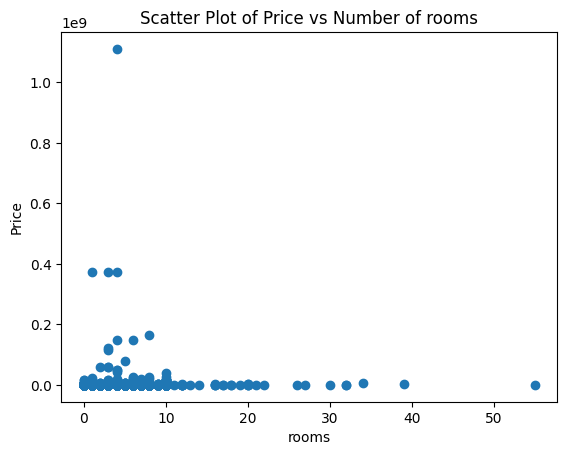

In [91]:
plt.scatter(data['rooms'], data['price'])
plt.xlabel('rooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Number of rooms')
plt.show()

In [92]:
mask = data['price'] >= 700000.0
data = data[~mask]

In [93]:
mask = data['price'] <= 14000.0
data = data[~mask]

In [94]:
data.drop(data[data['ad_type'].isin(['rent', 'land'])].index, inplace=True)

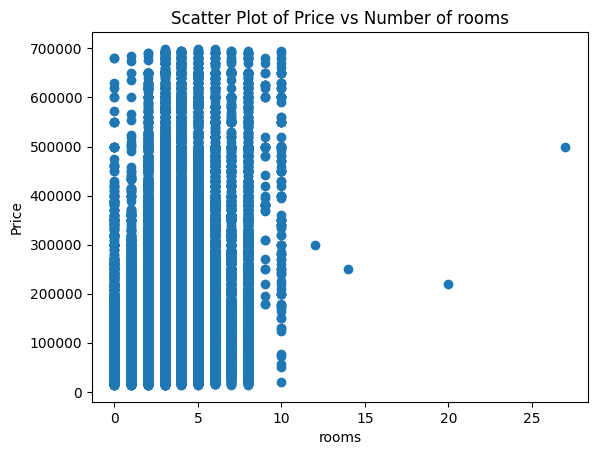

In [95]:
plt.scatter(data['rooms'], data['price'])
plt.xlabel('rooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Number of rooms')
plt.show()

In [96]:
mask = data['rooms'] >= 8
data = data[~mask]

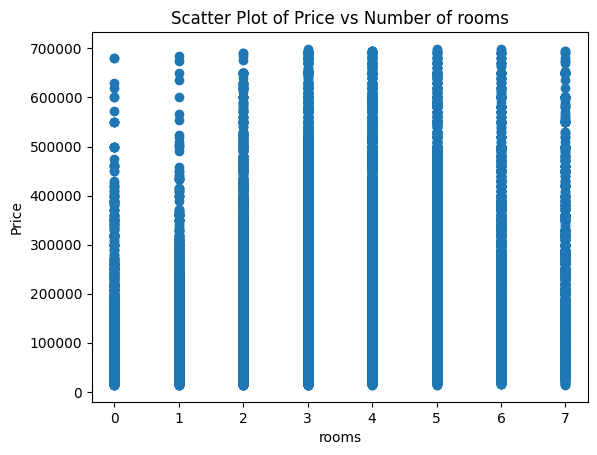

In [97]:
plt.scatter(data['rooms'], data['price'])
plt.xlabel('rooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Number of rooms')
plt.show()

<Axes: >

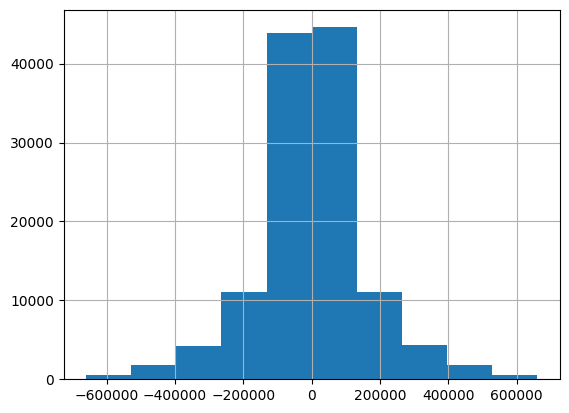

In [98]:
data["price"].diff().hist()

In [99]:
data['rooms'] = data['rooms'].fillna(data['rooms'].median())
data['baths'] = data['baths'].fillna(data['baths'].median())
print("Columns that have ,missing values  ", data.isna().sum())

Columns that have ,missing values   balcony                    21486
baths                          0
furniture                   8517
amenities                 116655
asphalt_road              128351
image                        222
elevator                   21486
lat                        46112
appliances                 57219
agency                         0
children_allowed               0
pets_allowed                   0
ad_type                        0
sewerage                  128351
url                            0
description                 8851
water                     128351
floor_area                   273
long                       46112
parking                    52447
utility_payments           45575
construction_type          83045
area                      128351
price                       2270
window_views              114379
rooms                          0
address                        2
scrap_time                     0
country                    20432
renovat

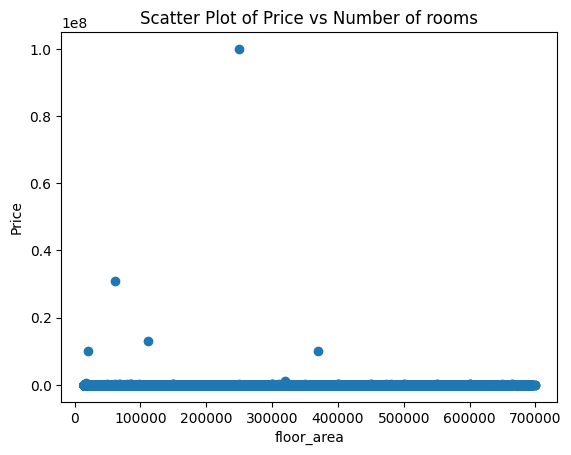

In [100]:
plt.scatter(data['price'], data['floor_area'])
plt.xlabel('floor_area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Number of rooms')
plt.show()

In [101]:
mask = data['floor_area'] <= 9
data = data[~mask]

In [102]:
mask = data['floor_area'] >= 400
data = data[~mask]

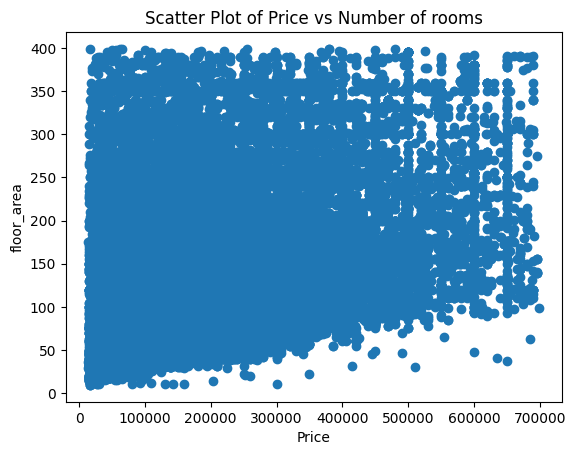

In [103]:
plt.scatter(data['price'], data['floor_area'])
plt.xlabel('Price')
plt.ylabel('floor_area')
plt.title('Scatter Plot of Price vs Number of rooms')
plt.show()

In [104]:
floor_mean = data['floor_area'].mean()
print(floor_mean)

96.0416951797931


In [105]:
data['floor_area'].fillna(floor_mean, inplace=True)

C:\Users\SPORTION AM\AppData\Local\Temp\ipykernel_3376\2188197070.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['floor_area'].fillna(floor_mean, inplace=True)


In [106]:
price_mean = data['price'].mean()
print(price_mean)

140379.69429371762


In [107]:
data['price'].fillna(price_mean, inplace=True)

C:\Users\SPORTION AM\AppData\Local\Temp\ipykernel_3376\327178974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].fillna(price_mean, inplace=True)


In [108]:
data.columns[data.notnull().all()]

Index(['baths', 'agency', 'children_allowed', 'pets_allowed', 'ad_type', 'url',
       'floor_area', 'price', 'rooms', 'scrap_time', 'new_construction',
       'prepayment', 'source', 'is_appartment'],
      dtype='object')

## Exercise 1

Filter the dataset to include only listings that allow pets and have an elevator.

In [109]:
Is_elevator = data[((data["elevator"] == 1)  |  (data["elevator"] == True))]
len(Is_elevator)

64560

In [110]:
Is_elevator["pets_allowed"].value_counts()

pets_allowed
True     46478
False    18082
Name: count, dtype: int64

In [111]:
elevetor_pets = Is_elevator[(Is_elevator["pets_allowed"] == True)]
len(elevetor_pets)

46478

Then, sort these listings by price in ascending order.

In [112]:
elevetor_pets["price"]

161713     41500.0
161714     75000.0
161718     85000.0
161721    100000.0
161726     67000.0
            ...   
249807     85000.0
249808    245000.0
249810     45500.0
249888     38000.0
249891     40000.0
Name: price, Length: 46478, dtype: float64

In [113]:
sorted_by_price = elevetor_pets.sort_values(by='price', ascending=True)
sorted_by_price['price']

227719     14100.0
233343     15000.0
191951     15700.0
239415     16000.0
191499     16700.0
            ...   
223315    684200.0
242559    688000.0
176795    689000.0
193380    690000.0
216763    691600.0
Name: price, Length: 46478, dtype: float64

## Exercise 2

 Select listings that have 2 or more baths, include furniture, and allow children

In [114]:
bath_child_furn = data[(data["baths"] >= 2) & (data["furniture"] == True) & (data["children_allowed"]== True)] 
len(bath_child_furn)

5580

Sort the results by floor area in descending order.

In [115]:
bath_child_furn["floor_area"]

161714     60.0
161715    330.0
161731    331.0
161739    135.0
161741     76.0
          ...  
249342    250.0
249348     98.0
249356     32.0
249366    105.0
249808    189.0
Name: floor_area, Length: 5580, dtype: float64

In [116]:
sorted_by_floor = bath_child_furn.sort_values(by='floor_area', ascending=False)
sorted_by_floor["floor_area"]

208259    397.0
162022    397.0
185514    392.0
168339    392.0
187057    391.0
          ...  
162558     25.2
248382     24.0
171986     22.0
219601     19.0
219863     14.0
Name: floor_area, Length: 5580, dtype: float64

## Exercise 3

   Convert the scrap_time column to a pandas datetime object.

In [117]:
data["scrap_time"] = pd.to_datetime(data["scrap_time"], format='mixed')
data["scrap_time"]

0        2023-12-20 22:31:53.162000+00:00
1        2023-12-20 22:31:53.166000+00:00
2        2023-12-20 22:31:53.167000+00:00
3        2023-12-20 22:31:53.167000+00:00
4        2023-12-20 22:31:53.168000+00:00
                       ...               
249888   2024-01-22 00:50:28.079000+00:00
249889   2024-01-22 00:50:28.080000+00:00
249891   2024-01-22 00:50:28.081000+00:00
249892   2024-01-22 00:50:28.082000+00:00
249893   2024-01-22 00:50:28.082000+00:00
Name: scrap_time, Length: 115600, dtype: datetime64[ns, UTC]

 Then, create a new DataFrame that contains the count of listings scraped per week and days.

In [37]:
data["scrap_time"].value_counts()

scrap_time
2023-12-20 22:31:56.077000+00:00    4
2023-12-20 22:31:55.677000+00:00    4
2023-12-20 22:31:55.679000+00:00    4
2023-12-20 22:31:57.721000+00:00    4
2023-12-20 22:31:55.681000+00:00    4
                                   ..
2024-01-08 11:35:34.275000+00:00    1
2024-01-08 11:35:34.271000+00:00    1
2024-01-08 11:35:34.269000+00:00    1
2024-01-08 11:35:34.268000+00:00    1
2024-01-08 11:36:00.592000+00:00    1
Name: count, Length: 101053, dtype: int64

In [38]:
data['day'] = data['scrap_time'].dt.day
data['day'].unique()

array([20,  2,  8, 17, 21, 22])

In [39]:
grouped_by_day = data["day"].value_counts()
grouped_by_day


day
8     72447
2     22530
20    20404
17      168
21       46
22        5
Name: count, dtype: int64

In [40]:
data['week'] = data['scrap_time'].dt.isocalendar().week
data['week']

0         51
1         51
2         51
3         51
4         51
          ..
249888     4
249889     4
249891     4
249892     4
249893     4
Name: week, Length: 115600, dtype: UInt32

In [41]:
grouped_by_week = data['week'].value_counts()
grouped_by_week

week
2     72447
1     22530
51    20404
3       214
4         5
Name: count, dtype: Int64

Plot this data to see which week and days had the highest number of listings.

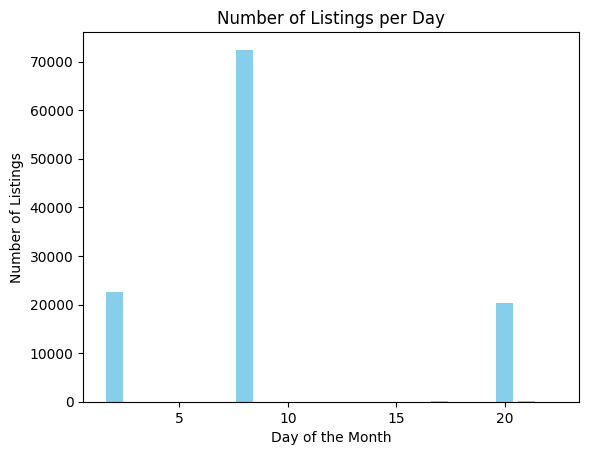

In [42]:

plt.bar(grouped_by_day.index, grouped_by_day.values, color='skyblue')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Day')
plt.show()

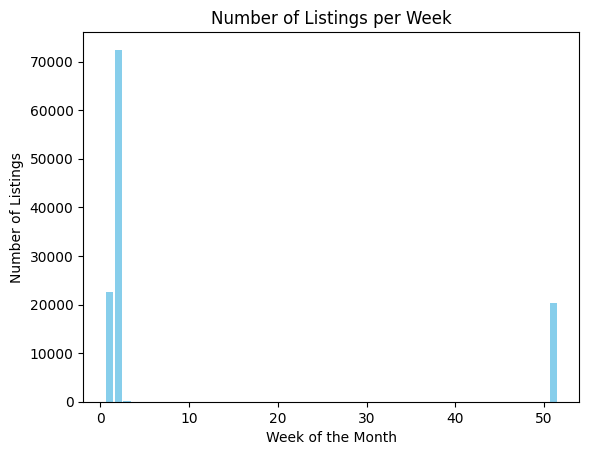

In [43]:

plt.bar(grouped_by_week.index, grouped_by_week.values, color='skyblue')
plt.xlabel('Week of the Month')
plt.ylabel('Number of Listings')
plt.title('Number of Listings per Week')
plt.show()

## Exercise 4

 Group the listings by country and new_construction (whether the listing is for a new construction).

In [44]:
country_new_const = data.groupby(['country', 'new_construction']).size().reset_index(name='count')
print(country_new_const)

   country  new_construction  count
0  Armenia             False  22723
1  Georgia             False  24091
2  Georgia              True  48382


In [45]:
keywords = ['new building', 'newly finished']
data['new_construction'] = data['title'].str.lower().str.contains('|'.join(keywords))

In [46]:
country_new_const = data.groupby(['country', 'new_construction']).size().reset_index(name='count')
print(country_new_const)

   country  new_construction  count
0  Armenia             False  19278
1  Armenia              True   3445
2  Georgia             False  27972
3  Georgia              True  44494


In [47]:
data['new_construction'] 

0         False
1          True
2         False
3          True
4         False
          ...  
249888     True
249889    False
249891     True
249892     True
249893     True
Name: new_construction, Length: 115600, dtype: object

For each group, calculate the average price and the total number of listings.

In [48]:
grouped_data = data.groupby(['country', 'new_construction']).agg({
    'price': ['mean'],
    'new_construction': 'count'
}).reset_index()

print(grouped_data)

   country new_construction          price new_construction
                                      mean            count
0  Armenia            False  150973.142112            19278
1  Armenia             True  231683.589864             3445
2  Georgia            False  133608.998284            27972
3  Georgia             True  122619.285746            44494


Sort the groups by average price in descending order.

In [49]:
grouped_data = data.groupby(['country', 'new_construction']).agg({'price': 'mean'}).reset_index()
sorted_data_des = grouped_data.sort_values(by='price', ascending=False)
print(sorted_data_des)

   country  new_construction          price
1  Armenia              True  231683.589864
0  Armenia             False  150973.142112
2  Georgia             False  133608.998284
3  Georgia              True  122619.285746


## Exercise 5

Create a new column luxury_score that is a sum of binary indicators for the following amenities/features: elevator, pets_allowed, parking, new_construction, and furniture (1 if the listing has the feature, 0 otherwise)


In [50]:
data["elevator"].value_counts()

elevator
True     64560
False    36828
1         1960
0         1276
Name: count, dtype: int64

In [51]:
data['elevator'] = data['elevator'].apply(lambda x: 1 if bool(x) else 0)

In [52]:
data["elevator"].value_counts()

elevator
1    78772
0    36828
Name: count, dtype: int64

In [53]:
data["parking"].value_counts()

parking
0.0                                         58302
Outdoor parking                             10183
0                                            2531
1.0                                           869
Outdoor parking, covered parking              701
Garage                                        595
Outdoor parking, garage                       348
Covered parking                               346
Outdoor parking, covered parking, garage      238
1                                              39
Covered parking, garage                        27
Name: count, dtype: int64

In [54]:
data['parking'] = data['parking'].apply(lambda x: 1 if x and x != 0 else 0)

In [55]:
data["parking"].value_counts()

parking
0    58302
1    57298
Name: count, dtype: int64

In [56]:
data["pets_allowed"].value_counts()

pets_allowed
True     72473
False    43127
Name: count, dtype: int64

In [57]:
data["new_construction"].value_counts()

new_construction
False    62084
True     53509
Name: count, dtype: int64

In [58]:
data["furniture"].value_counts()

furniture
False    87699
True     27487
Name: count, dtype: int64

In [59]:
luxury_features = ['elevator', 'pets_allowed', 'parking', 'new_construction', 'furniture']
data['luxury_score'] = data[luxury_features].sum(axis=1)
print( data.iloc[:, -1:])

       luxury_score
0                 2
1                 3
2                 1
3                 3
4                 1
...             ...
249888            4
249889            3
249891            4
249892            3
249893            3

[115600 rows x 1 columns]


In [60]:
data['luxury_score'].value_counts()

luxury_score
2    40058
3    32070
1    21546
4    17963
5     3963
Name: count, dtype: int64

 Filter for listings in the top 10% of luxury_score, and then sort by price descending.

In [61]:
luxury_score_threshold = data['luxury_score'].quantile(0.9)
top_10_percent = data[data['luxury_score'] >= luxury_score_threshold]
top_10_percent['luxury_score'].value_counts()

luxury_score
4    17963
5     3963
Name: count, dtype: int64

In [62]:
top_10_percent_sorted = top_10_percent.sort_values(by='price', ascending=False)
top_10_percent_sorted['price']

193380    690000.0
167345    685000.0
243641    680000.0
163352    680000.0
187256    680000.0
            ...   
214615     22300.0
182469     22000.0
234113     21500.0
225357     18000.0
162604     17000.0
Name: price, Length: 21926, dtype: float64

## Exercise 6:

Plot the distribution of floor_area for apartments (is_appartment = True) versus houses. Use histograms or boxplots to compare the distributions.

In [63]:
data['ad_type'].value_counts()


ad_type
sale    115600
Name: count, dtype: int64

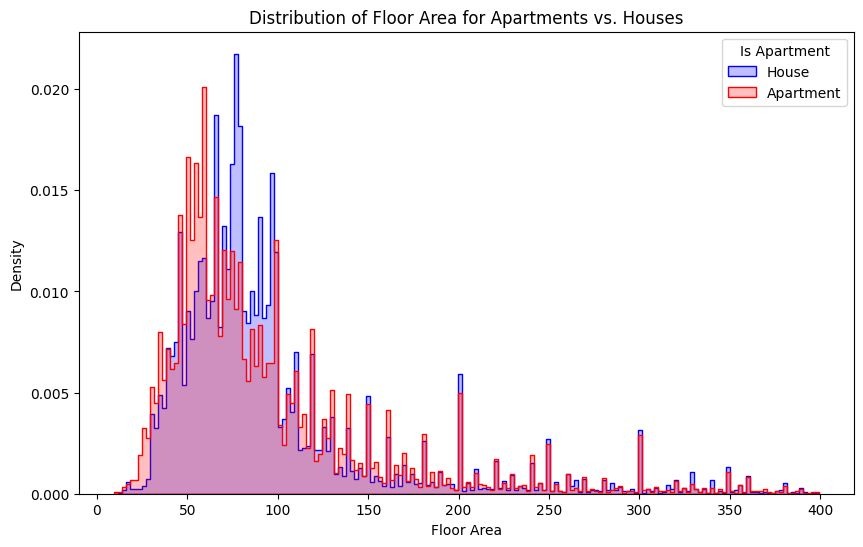

In [64]:
custom_palette = {True: 'blue', False: 'red'}
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='floor_area', hue='is_appartment', element='step', stat='density', common_norm=False, palette=custom_palette)
plt.title('Distribution of Floor Area for Apartments vs. Houses')
plt.xlabel('Floor Area')
plt.ylabel('Density')
plt.legend(title='Is Apartment', labels=['House', 'Apartment'])
plt.show()

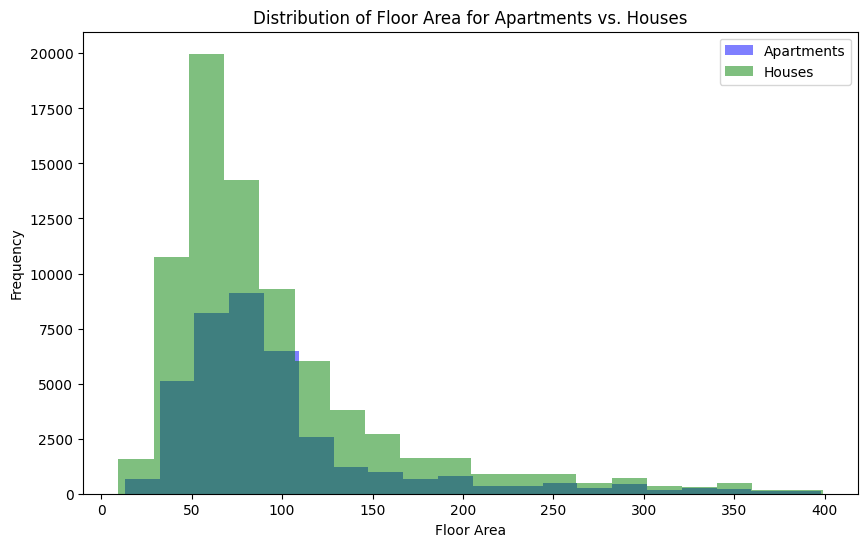

In [65]:
apartments = data[data['is_appartment'] == True]
houses = data[data['is_appartment'] == False]

# Plot histograms for 'floor_area' for apartments and houses
plt.figure(figsize=(10, 6))
plt.hist(apartments['floor_area'], bins=20, alpha=0.5, label='Apartments', color='blue')
plt.hist(houses['floor_area'], bins=20, alpha=0.5, label='Houses', color='green')
plt.title('Distribution of Floor Area for Apartments vs. Houses')
plt.xlabel('Floor Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\SPORTION AM\AppData\Local\Temp\ipykernel_3376\532663103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_appartment', y='floor_area', data=data,palette={'True': 'blue', 'False': 'red'})


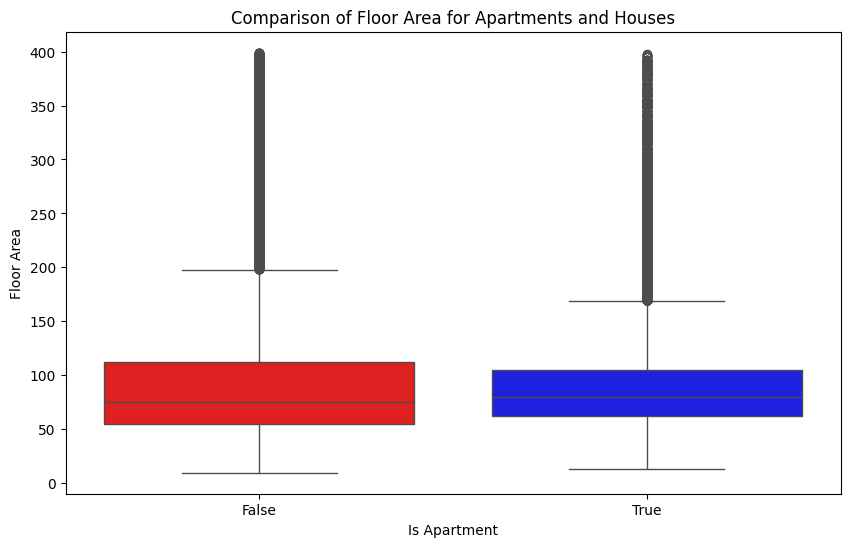

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_appartment', y='floor_area', data=data,palette={'True': 'blue', 'False': 'red'})
plt.title('Comparison of Floor Area for Apartments and Houses')
plt.xlabel('Is Apartment')
plt.ylabel('Floor Area')
plt.show()

## Exercise 7: Time Series Analysis

After converting scrap_time to a datetime object, analyze the trend of average listing prices over time. 

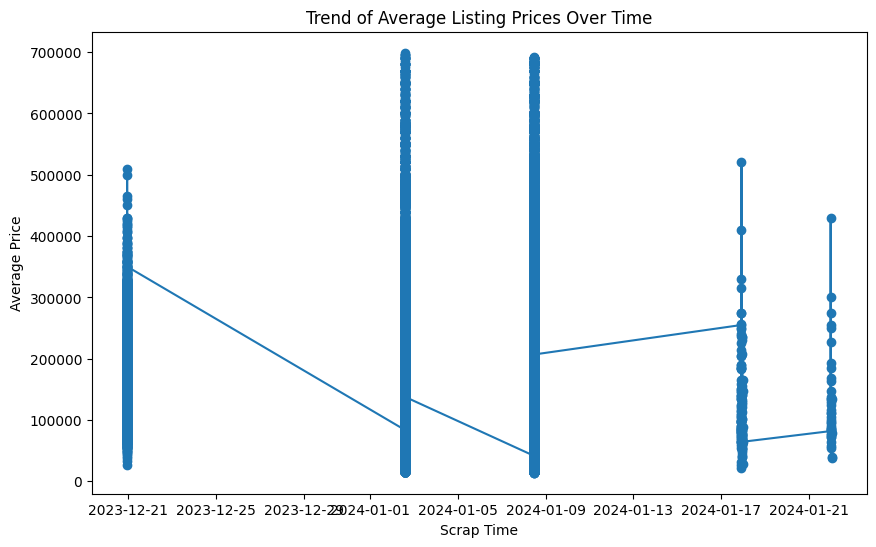

In [129]:

average_prices = data.groupby('scrap_time')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values, marker='o')
plt.title('Trend of Average Listing Prices Over Time')
plt.xlabel('Scrap Time')
plt.ylabel('Average Price')
plt.show()